# Plot data

In [1]:
import sys
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import pandas as pd

from tree.parameters import Ts

# Plot radical thermochemical data

In [2]:
radical_data_df = pd.read_csv("../data/radical_data.csv")
radical_data_df

,smiles,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),source,level_of_theory,Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K)
0,[O]C(=O)OC(O)(O)O,-223.514126,93.816804,95.999974,dong_pio_liang.py,CBS-QB3,33.926878,38.387673,41.508496,44.062390,47.779730,50.089328,52.510168
1,[O]C(O)(O)OC(=O)O,-223.423390,92.781436,92.781436,dong_pio_liang.py,CBS-QB3,32.531179,37.569659,41.498443,44.710460,49.355989,52.184758,54.821371
2,O=C(O)O[C](O)O,-187.322869,88.139642,89.517068,dong_pio_liang.py,CBS-QB3,28.973242,34.553073,38.746721,41.655671,45.237515,47.423507,49.461069
3,CC(=O)OC(OO)C(=O)C(O)O[O],-185.660577,133.205064,132.633380,dong_pio_liang.py,CBS-QB3,56.569703,66.028226,73.603744,79.772844,88.705511,94.174908,99.503777
4,O=[C]OC(O)(O)O,-180.497563,87.848805,90.031975,dong_pio_liang.py,CBS-QB3,32.378191,36.844343,39.334179,41.301130,44.143726,45.893560,47.744589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,C=C=C1[CH]C1=C,148.970420,78.606070,81.360924,dong_pio_liang.py,CBS-QB3,25.185446,30.771706,34.989720,38.456637,43.926501,47.843872,53.411105
2233,[CH]=C1C=C1,152.166735,66.134536,67.511963,dong_pio_liang.py,CBS-QB3,16.390064,19.702535,22.399354,24.484680,27.637313,29.841300,32.891319
2234,C1=C[CH]C=1,156.106582,64.008341,65.385768,dong_pio_liang.py,CBS-QB3,14.653111,18.488757,21.562144,23.855179,27.322032,29.749165,33.017640
2235,C=C=C1C=[C]C1,157.733085,76.210198,77.587625,dong_pio_liang.py,CBS-QB3,22.675255,28.333884,32.976246,36.811783,42.847715,47.149236,53.155423


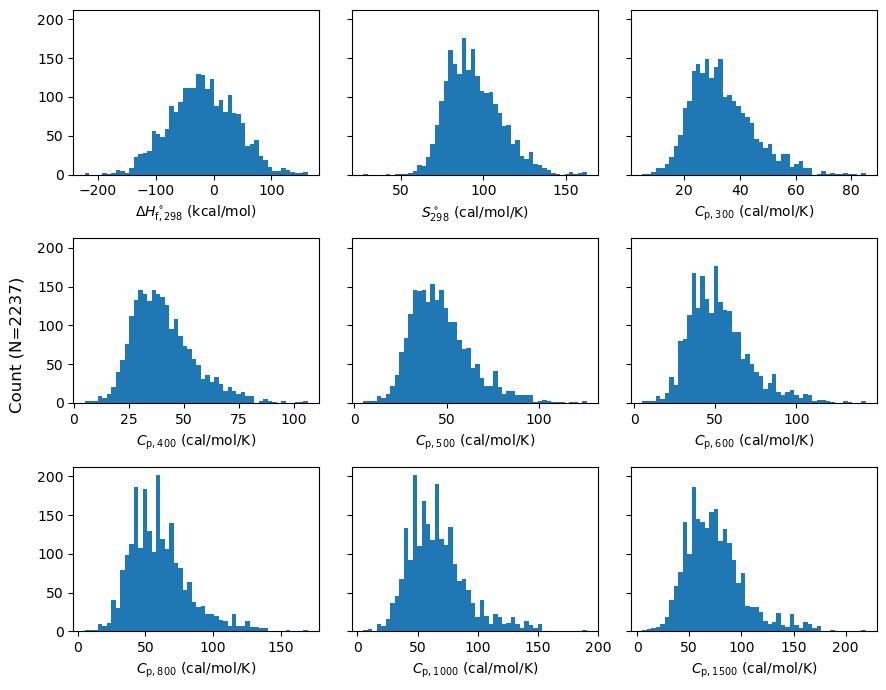

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
ax = axs.flat[0]
ax.hist(radical_data_df["H298 (kcal/mol)"], bins=50)
ax.set_xlabel("$\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)")

ax = axs.flat[1]
ax.hist(radical_data_df["S298 (cal/mol/K)"], bins=50)
ax.set_xlabel("$S^\circ_\mathrm{298}$ (cal/mol/K)")

for ax, T in zip(axs.flat[2:], Ts):
    ax.hist(radical_data_df[f"Cp{T} (cal/mol/K)"], bins=50)
    ax.set_xlabel("$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)")

fig.supylabel(f"Count (N={len(radical_data_df.index)})")
fig.tight_layout()
fig.savefig("../figures/data_radical_hist.pdf", bbox_inches="tight")